<a href="https://colab.research.google.com/github/AngelGui/MachineLearning/blob/main/KNN_display_the_cluster_boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

data = load_iris()
train = data['data']
target = data['target'].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)  #这里得注明是test_size=0.2, 不能直接写0.2
# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)


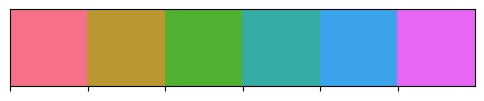

In [10]:
import seaborn as sns
colors = sns.color_palette('husl')
colors
sns.palplot(colors)


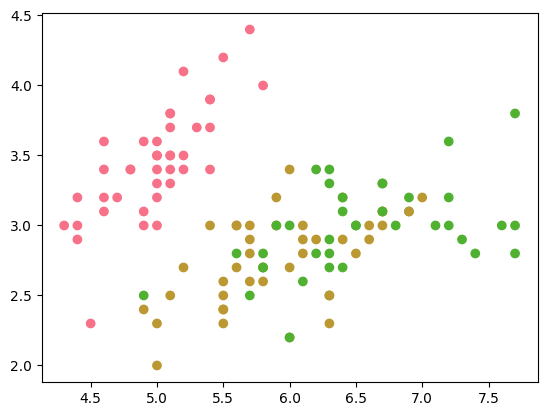

In [13]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(colors[:3])
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap)

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1.0

In [17]:
xmin, xmax = X_train[:, 0].min(), X_train[:, 0].max()
ymin, ymax = X_train[:, 1].min(), X_train[:, 1].max()

x_points = np.linspace(xmin, xmax, 100)
y_points = np.linspace(ymin, ymax, 80)

X_test_points = []
for i in range(len(x_points)):
  for j in range(len(y_points)):
    X_test_points.append([x_points[i], y_points[j]])
X_test_points = np.array(X_test_points)
X_test_points.shape

(8000, 2)

In [18]:
knn.fit(X_train[:, 0:2], y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

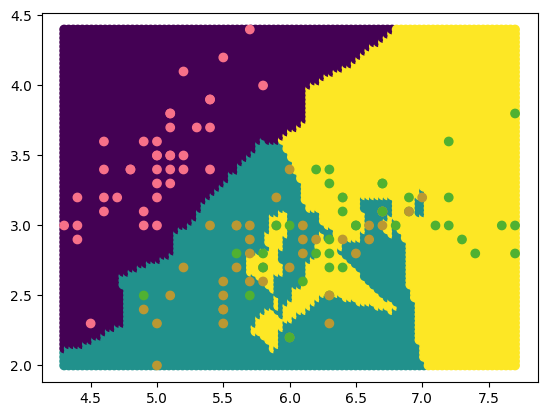

In [21]:
y_test_points = knn.predict(X_test_points)
from matplotlib.colors import ListedColormap
cmap = ListedColormap(colors[:3])
plt.scatter(X_test_points[:, 0], X_test_points[:, 1], c=y_test_points)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cmap)


In [23]:
xx, yy = np.meshgrid(x_points, y_points)
yy

array([[2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ],
       [2.03037975, 2.03037975, 2.03037975, ..., 2.03037975, 2.03037975,
        2.03037975],
       [2.06075949, 2.06075949, 2.06075949, ..., 2.06075949, 2.06075949,
        2.06075949],
       ...,
       [4.33924051, 4.33924051, 4.33924051, ..., 4.33924051, 4.33924051,
        4.33924051],
       [4.36962025, 4.36962025, 4.36962025, ..., 4.36962025, 4.36962025,
        4.36962025],
       [4.4       , 4.4       , 4.4       , ..., 4.4       , 4.4       ,
        4.4       ]])

In [26]:
np.c_[xx.ravel(), yy.ravel()] #这里一定要注意是用[]，而不是使用()

array([[4.3       , 2.        ],
       [4.33434343, 2.        ],
       [4.36868687, 2.        ],
       ...,
       [7.63131313, 4.4       ],
       [7.66565657, 4.4       ],
       [7.7       , 4.4       ]])